In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
import joblib

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

In [2]:
from src.Bayesian_state import *
from src.Bayesian_state.problems.config import config_fgt
from src.Bayesian_state.problems import *
# from src.Bayesian_state.utils.optimizer import Optimizer, ConstantDict
# from src.Bayesian_state.utils.model_evaluation import ModelEval

INFO:cat-learning:logger is running normally.


d:\Research\nips_reviewing\CategoryLearning\StateBased\CategoryLearning\logs\Run_20251015_211611.log
{'base_model': {'modules': {'likelihood_mod': {'class': 'src.Bayesian_state.problems.modules.likelihood.LikelihoodModule', 'kwargs': {}}}, 'agenda': ['likelihood_mod', '__self__']}, 'default_model': {'modules': {}, 'agenda': ['__self__']}, 'pmh_model': {'modules': {'memory': {'class': 'BaseMemory', 'kwargs': {}}, 'likelihood': {'class': 'BaseLikelihood', 'kwargs': {}}, 'perception': {'class': 'BasePerception', 'kwargs': {}}, 'hypotheses': {'class': 'BaseHypotheses', 'kwargs': {}}}, 'agenda': ['perception', 'likelihood', 'hypotheses', 'memory']}}


In [3]:
processed_path = Path(project_root) / 'data' / 'processed'
learning_data = pd.read_csv(processed_path / 'Task2_processed.csv')

subject_id = 2
subject_data = learning_data[learning_data["iSub"] == subject_id]
condition = subject_data["condition"].iloc[0]
s_data = (
    subject_data[["feature1", "feature2", "feature3", "feature4"]].values,
    subject_data["choice"].values,
    subject_data["feedback"].values
)

In [4]:
beta_range = (1, 30)
beta_resolution = 5
beta_grid = np.linspace(beta_range[0], beta_range[1], beta_resolution)

In [5]:
from src.Bayesian_state.problems import StandardModel, StateModel
from src.Bayesian_state.utils.load_config import MODEL_STRUCT

# 打印字典并排版
import pprint
pprint.pprint(MODEL_STRUCT)

model = StateModel(MODEL_STRUCT['base_model'],condition=condition)

INFO:cat-learning:  - Module 'likelihood_mod' registered as 'self.likelihood_mod'.


{'base_model': {'agenda': ['likelihood_mod', '__self__'],
                'modules': {'likelihood_mod': {'class': 'src.Bayesian_state.problems.modules.likelihood.LikelihoodModule',
                                               'kwargs': {}}}},
 'default_model': {'agenda': ['__self__'], 'modules': {}},
 'pmh_model': {'agenda': ['perception', 'likelihood', 'hypotheses', 'memory'],
               'modules': {'hypotheses': {'class': 'BaseHypotheses',
                                          'kwargs': {}},
                           'likelihood': {'class': 'BaseLikelihood',
                                          'kwargs': {}},
                           'memory': {'class': 'BaseMemory', 'kwargs': {}},
                           'perception': {'class': 'BasePerception',
                                          'kwargs': {}}}}}
{'likelihood_mod': {'class': 'src.Bayesian_state.problems.modules.likelihood.LikelihoodModule', 'kwargs': {}}}


In [6]:
# 按trial重整数据
input_data = []
trial_total_num = subject_data.shape[0]
for i in range(trial_total_num):
    input_data.append([s_data[0][i],s_data[1][i], s_data[2][i]])

In [7]:
results_state = model.fit_step_by_step(input_data, beta=0.5)

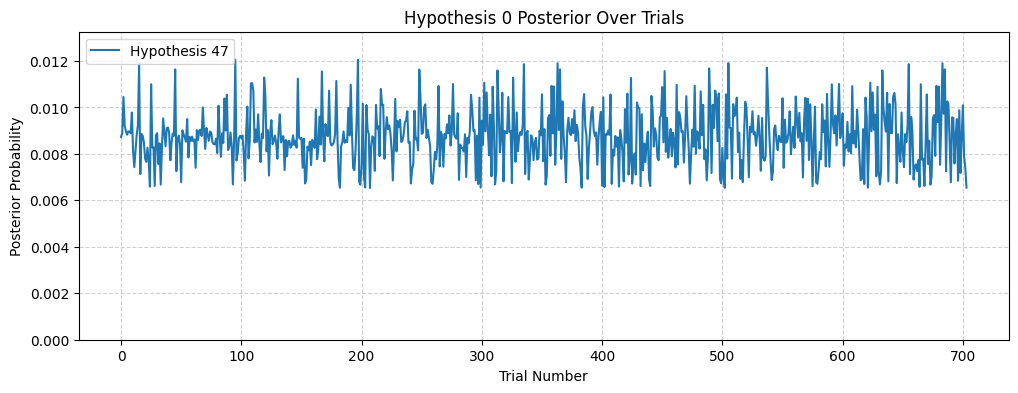

In [8]:
# 画图

import matplotlib.pyplot as plt

def plot_hypo_posterior(posterior_log: list, hypo_index: int, title: str = None):
    
    hypo_posterior_over_time = [posterior[hypo_index] for posterior in posterior_log]
    
    max_post = max(hypo_posterior_over_time)
    trials = np.arange(len(hypo_posterior_over_time))

    plt.figure(figsize=(12, 4))
    plt.plot(trials, hypo_posterior_over_time, linestyle='-', label=f'Hypothesis {hypo_index}')
    
    if title is None:
        title = f'Posterior Probability of Hypothesis {hypo_index} Over Trials'
    plt.title(title)
    plt.xlabel('Trial Number')
    plt.ylabel('Posterior Probability')
    plt.ylim(0, max_post * 1.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()


plot_hypo_posterior(results_state, hypo_index=47, title="Hypothesis 0 Posterior Over Trials")